In [1]:
# !pip install torchinfo

### 결과
[go_1](./result_test/decision_go_1.png), 
[go_2](./result_test/decision_go_2.png), 
[go_3](./result_test/decision_go_3.png), 
[go_4](./result_test/decision_go_4.png), 
[go_5](./result_test/decision_go_5.png),   

[stop_1](./result_test/decision_stop_1.png), 
[stop_2](./result_test/decision_stop_2.png), 
[stop_3](./result_test/decision_stop_3.png), 
[stop_4](./result_test/decision_stop_4.png), 
[stop_5](./result_test/decision_stop_5.png),  

### 문제점
1. 레이블을 보면, 모델은 신호등 레이블이 없기 때문에 신호등을 판단할 수 없다.
    - 알고리즘으로 신호등을 이미지 내에서 찾고 Go, Stop을 판단하도록 했다 

2. stop1, stop2의 객체(사람)가 탐지가 되지 않음
    - 모델이 객체를 잘못 탐지한다. > 재학습 혹은 모델 구조, 데이터 구조 변경 필요

3. go를 우선해야 하는가 stop을 우선해야하는가
    - go를 Default로 설정하기  
        장점: 
            - 이미지 내 노이즈나 모델의 오탐에 일일히 반응하지 않고 주행 효율을 높일 수 있다  
            - 디폴트가 go이기 때문에 갑자기 급정거(stop)을 하지 않는다.  
        단점: 
            - 실제 빨간불이나 보행자를 감지하지 못하는 미검출(False Negative) 발생 시 차량이 멈추지 않아 치명적인 사고로 직결될 위험이 큽니다
            - 안전보다 주행을 우선시하므로 시스템 신뢰도가 완벽하지 않은 상태에서는 법적, 윤리적 책임 문제에서 매우 취약해집니다

    - stop를 Default로 설정하기
        장점:  
            - "확실한 초록색 신호가 아니라면 정지한다"는 'Fail-safe' 원칙을 구현하여 시스템 불확실성을 안전으로 치환할 수 있습니다
            - 인지 성능이 낮은 상황에서도 보행자 보호와 인명 사고 차단을 최우선으로 하여 자율주행의 궁극적인 목표인 안전성을 확보합니다
        단점:  
            - 낮은 신뢰도의 객체에도 민감하게 반응하여 잦은 급정거를 유발하고, 이는 뒤차와의 추돌 사고를 일으키는 원인이 될 수 있습니다.
            - 복잡하거나 모호한 도로 상황에서 차량이 지나치게 방어적으로 행동하여 주행이 불가능해지는 '교통 마비' 현상을 초래할 수 있습니다.

4. stop4와 stop5가 왜 멈춰야 하는 지 모르겠다.
    - 이미지를 보면 주변에 주차된 차량이 많지만 차량이 가야하는 방향에는 객체가 없다. 만약 이 상황에서 멈춰야 한다면, 차량 사이에서 뛰어나올 위험이나 주차된 차량이 갑자기 움질일 가능성이 있기 때문에 정차를 해야한다고 생각한다. 그렇다면 어떻게 조건을 설정해야 하는가에 기준을 정할 수 없었다.

    stop4
    - 차량이 가야하는 방향에 영역을 표시하고 그 영역 내에 많은 차량이 주차되어 있다면 stop이라는 조건으로 설정한다면 차량은 주차장에서 급정거(stop)를 하게 될 것이다.

    - 차량이 가야하는 방향에 영역을 표시하고 그 영역 일부분(우하단 중심에 차량이 있다고 가정)에 객체가 있을 때 stop이라고 하면 방법 자체는 좋을 수 있으나 현재 바운딩 박스를 기준으로 객체를 탐지하고 있기 때문에 불필요한 배경도 바운딩박스에 포함되어 있다.

    stop 5
    - 이건 왜 stop으로 레이블된 건지 모르겠다.
        - 가정1: 이미지를 보면(사람 기준) 주차된 차량 중 사람으로 추정되는 객체가 탐지되기 때문에 stop을 해야한다.
        > 이건 저 영역을 사람으로 판단할 수 있게 모델을 구성 혹은 데이터를 준비하면 된다.
        - 가정2: 이미지 내 현재 차량이 주행 중인 곳이 일반적인 도로가 아니기 때문에 stop을 해야 한다.
        > 이건 모델이 도로의 특징을 알 수 있어야 한다. 예를 들어 아스팔트 도로(국도)와 사람과 같이 다닐 수 있는 도로(인도와는 다름)의 특징을 구별할 수 있어야 한다.  
    
        따라서 예상이지만 가정1로 인해서 stop이라고 생각한다.

5. test 데이터가 적어서 모델의 일반화 성능을 대변할 수 없다.
-  데이터를 더 준비해야 하지만 시간이 부족해 어려움이 있다.

6. 모델은 주행하는 차선을 구별할 수 없다 따라서 별도의 로직이 필요한데 도로의 특징뿐만 아니라 이미지에서 반영하는 도로의 특징도 고려해야 하기 때문에 어려움이 많다.
- 도로의 특징: 차선이 있는가, 사람이 다닐 수 있는가, 재질, 연석, 가드레일, 신호등, 표지판
- 이미지 내 도로의 특징: 도로의 라인을 찾을 수 있어야 하는데 원근법을 고려하거나 쵤영되는 위치, 도로의 각도등 고려해야 할것이 너무 많다.

### 회고
객체 탐지가 많이 어렵고 바운딩 박스의 단점도 알게 되었다. 왜 세그멘테이션 기법이 나왔는 지를 알 수 있었다. 그리고 모델의 성능이 안 나오는 건 학습 과정에서 문제일 수도 있지만, 데이터셋(이미지 편향, 레이블)의 문제일 수도 있다는 것을 알게 되었다.

### 자율 주행 보조 장치

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

import torchvision.transforms.functional as TF
import torchvision.transforms as T
from torchvision import transforms
from torchvision.datasets import Kitti
import torchvision.models as models
from torchvision.ops import nms

import os, copy, time
import numpy as np
import random
from typing import Dict, List, Tuple, Optional, Callable
import argparse
from tqdm import tqdm
import pandas as pd

import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

print('슝=3')

슝=3


In [3]:
DATA_DIR = './data' # 여기 아래에 Kitti/raw/... 구조가 생김

transform = transforms.Compose([
    transforms.ToTensor(),   # PIL → torch.Tensor [0, 1]
])

def target_transform(target):
    # 입력된 label 정보를 변환하기 위한 기능
    # target: list[dict], 각 dict에 keys: type, truncated, occluded, alpha, bbox, dimensions, location, rotation_y
    # 예: 여기서는 일단 그대로 반환
    return target

train_dataset = Kitti(
    root=DATA_DIR,
    train=True,
    transform=transform,
    target_transform=target_transform,  # 필요 없으면 None
    download=None,                      # 한 번만 True면 됨
)
test_dataset = Kitti(
    root=DATA_DIR,
    train=False,
    transform=transform,
    target_transform=None,
    download=False,
)
print("Train data samples: ", len(train_dataset))
print("Test data samples: ", len(test_dataset))
print('슝=3')

Train data samples:  7481
Test data samples:  7518
슝=3


Image index: 3002
------Example------


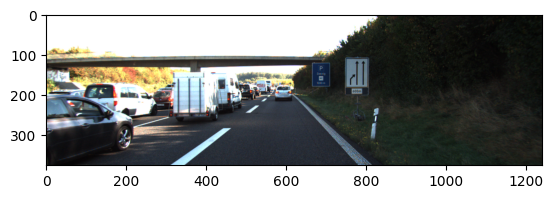

torch.Size([3, 376, 1241])
['type', 'truncated', 'occluded', 'alpha', 'bbox', 'dimensions', 'location', 'rotation_y']

------objects------
[{'type': 'Car', 'truncated': 0.0, 'occluded': 0, 'alpha': -1.57, 'bbox': [571.85, 174.73, 615.97, 214.95], 'dimensions': [1.6, 1.76, 3.84], 'location': [-0.62, 1.18, 30.82], 'rotation_y': -1.59}, {'type': 'Car', 'truncated': 0.73, 'occluded': 0, 'alpha': -0.9, 'bbox': [0.0, 190.84, 240.61, 375.0], 'dimensions': [1.49, 1.64, 3.95], 'location': [-5.07, 1.58, 6.22], 'rotation_y': -1.56}, {'type': 'Van', 'truncated': 0.0, 'occluded': 1, 'alpha': -1.06, 'bbox': [89.42, 168.43, 282.95, 270.0], 'dimensions': [1.78, 1.66, 3.84], 'location': [-8.35, 1.48, 14.61], 'rotation_y': -1.57}, {'type': 'Misc', 'truncated': 0.0, 'occluded': 0, 'alpha': -1.27, 'bbox': [299.46, 140.77, 444.75, 272.69], 'dimensions': [2.23, 1.88, 2.54], 'location': [-4.34, 1.47, 13.51], 'rotation_y': -1.57}, {'type': 'Van', 'truncated': 0.0, 'occluded': 1, 'alpha': -1.35, 'bbox': [372.9

In [4]:
idx = random.randint(0, len(train_dataset)-1)   # 한 장의 샘플 데이터를 무작위로 추출합니다.
sample = train_dataset[idx]

print("Image index:", idx)

print('------Example------')
image = sample[0]
img = TF.to_pil_image(image)
plt.imshow(img)
plt.show()
print(np.shape(image))
print(list(sample[1][0].keys()))

print('\n------objects------')
objects = sample[1]
print(objects)

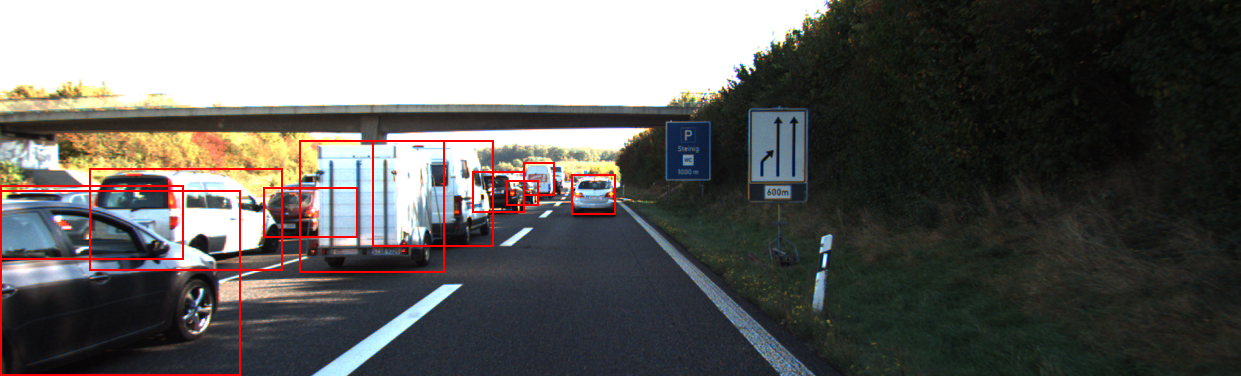

In [5]:
# 이미지 위에 바운딩 박스를 그려 화면에 표시해 주세요.
def visualize_bbox(input_image, objects):
    input_image = copy.deepcopy(input_image)
    draw = ImageDraw.Draw(input_image)

    for _obj in objects:
        # 바운딩 박스 좌표(x_min, x_max, y_min, y_max) 구하기
        height, width, _ = np.shape(input_image)
        x_min, y_min, x_max, y_max = _obj['bbox']
        
        # 바운딩 박스 그리기
        draw.rectangle([x_min, y_min, x_max, y_max], outline=(255,0,0), width=2)

    return input_image

visualize_bbox(img, objects)

### 3. RetinaNet  
- FPN은 하단에서 상단으로 가는 일반적 연산에 더해, 위에서 아래로 내려오는 경로와 옆으로 이어지는 연결을 통해 다양한 크기의 객체를 정확히 인식할 수 있는 특징 지도를 만드는 구조입니다.   
- RetinaNet은 이 FPN을 기반으로 하여 객체의 종류를 맞히는 부분과 위치를 찾는 부분을 별도로 둔 구조이며, 특히 Focal Loss를 도입해 배경만 많고 객체는 적은 상황에서도 학습 효율을 극대화한 탐지 모델입니다.  
- Focal Loss는 맞히기 쉬운 샘플(Easy Examples)의 손실 비중은 낮추고, 맞히기 어려운 샘플(Hard Examples)에 가중치를 두어 클래스 불균형(Class Imbalance) 문제를 해결하는 손실 함수입니다.

### 4 데이터 준비

In [6]:
class KITTIDataset(Dataset):
    """
    KITTI 객체 탐지 데이터셋
    
    Args:
        img_dir: 이미지 디렉토리 경로
        label_dir: 레이블 디렉토리 경로
        classes: 사용할 클래스 리스트 (None이면 모든 클래스 사용)
        exclude_dontcare: DontCare 객체 제외 여부
    """
    
    # KITTI 데이터셋의 모든 클래스
    ALL_CLASSES = [
        'Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 
        'Cyclist', 'Tram', 'Misc', 'DontCare'
    ]
    
    def __init__(
        self,
        img_dir: str,
        label_dir: str,
        classes: Optional[List[str]] = None,
        exclude_dontcare: bool = True
    ):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.exclude_dontcare = exclude_dontcare
        
        # 사용할 클래스 설정
        if classes is None:
            self.classes = [c for c in self.ALL_CLASSES if c != 'DontCare']
        else:
            self.classes = classes
            
        # 클래스명 -> 인덱스 매핑 (0부터 시작)
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
        self.idx_to_class = {idx: cls_name for cls_name, idx in self.class_to_idx.items()}
        
        # 이미지 파일 리스트 가져오기
        self.image_files = self._get_image_files()
        
        print(f"KITTIDataset 초기화 완료:")
        print(f"  - 이미지 개수: {len(self.image_files)}")
        print(f"  - 클래스 개수: {len(self.classes)}")
        print(f"  - 클래스: {self.classes}")
        
    def _get_image_files(self) -> List[str]:
        """이미지 파일 목록을 가져오고 검증합니다."""
        image_files = []
        
        # 이미지 디렉토리의 모든 PNG 파일 찾기
        for fname in sorted(os.listdir(self.img_dir)):
            if fname.endswith('.png') or fname.endswith('.jpg'):
                img_path = os.path.join(self.img_dir, fname)
                label_path = os.path.join(self.label_dir, fname.replace('.png', '.txt').replace('.jpg', '.txt'))
                
                # 이미지와 레이블 모두 존재하는지 확인
                if os.path.exists(img_path) and os.path.exists(label_path):
                    image_files.append(fname)
                else:
                    print(f"경고: {fname}의 레이블 파일이 없습니다.")
                    
        return image_files
    
    def _parse_label(self, label_path: str) -> Tuple[np.ndarray, np.ndarray]:
        """
        레이블 파일을 파싱하여 bbox와 클래스 정보를 추출합니다.
        
        Returns:
            boxes: (N, 4) numpy array of [x_min, y_min, x_max, y_max]
            labels: (N,) numpy array of class indices
        """
        boxes = []
        labels = []
        
        if not os.path.exists(label_path):
            return np.zeros((0, 4), dtype=np.float32), np.zeros((0,), dtype=np.int64)
        
        with open(label_path, 'r') as f:
            for line in f:
                line = line.strip()
                if not line:
                    continue
                    
                parts = line.split()
                if len(parts) < 15:
                    continue
                
                class_name = parts[0]
                
                # DontCare 제외 옵션 처리
                if self.exclude_dontcare and class_name == 'DontCare':
                    continue
                
                # 사용할 클래스에 포함되지 않으면 스킵
                if class_name not in self.class_to_idx:
                    continue
                
                # Bounding box 좌표 (2D bbox)
                try:
                    bbox = [float(parts[4]), float(parts[5]), 
                           float(parts[6]), float(parts[7])]
                    
                    # 유효한 bbox인지 확인
                    if bbox[2] > bbox[0] and bbox[3] > bbox[1]:
                        boxes.append(bbox)
                        labels.append(self.class_to_idx[class_name])
                except (ValueError, IndexError):
                    continue
        
        if len(boxes) == 0:
            return np.zeros((0, 4), dtype=np.float32), np.zeros((0,), dtype=np.int64)
        
        return np.array(boxes, dtype=np.float32), np.array(labels, dtype=np.int64)
    
    def __len__(self) -> int:
        """데이터셋의 크기를 반환합니다."""
        return len(self.image_files)
    
    def __getitem__(self, idx: int) -> Dict:
        """
        인덱스에 해당하는 샘플을 반환합니다.
        
        Returns:
            dict: {
                'image': PIL.Image,
                'boxes': np.ndarray (N, 4),
                'labels': np.ndarray (N,),
                'image_id': str
            }
        """
        # 파일명 가져오기
        fname = self.image_files[idx]
        img_path = os.path.join(self.img_dir, fname)
        label_path = os.path.join(self.label_dir, fname.replace('.png', '.txt').replace('.jpg', '.txt'))
        
        # 이미지 로드
        image = Image.open(img_path).convert('RGB')
        
        # 레이블 파싱
        boxes, labels = self._parse_label(label_path)
        
        # 결과 딕셔너리 생성
        target = {
            'image': image,
            'boxes': boxes,
            'labels': labels,
            'image_id': fname.replace('.png', '').replace('.jpg', '')
        }
        
        return target
    
    def get_class_name(self, idx: int) -> str:
        """클래스 인덱스를 클래스 이름으로 변환합니다."""
        return self.idx_to_class.get(idx, 'Unknown')
    
    def get_num_classes(self) -> int:
        """클래스 개수를 반환합니다 (배경 제외)."""
        return len(self.classes)

In [7]:
class RandomHorizontalFlip:
    """랜덤 좌우 반전 + bbox 좌표 조정."""
    
    def __init__(self, p=0.5):
        self.p = p
    
    def __call__(self, image, target):
        if random.random() < self.p:
            # 이미지가 PIL인지 Tensor인지 확인
            if isinstance(image, Image.Image):
                image = TF.hflip(image)
                width, _ = image.size
            else:  # Tensor
                image = TF.hflip(image)
                _, _, width = image.shape
            
            # Bounding box 좌표 변환
            boxes = target['boxes'].copy()
            if len(boxes) > 0:
                boxes[:, [0, 2]] = width - boxes[:, [2, 0]]
                target['boxes'] = boxes
        
        return image, target

class ColorJitter:
    """색상 변환: 밝기, 대비, 채도, 색조 조정."""
    
    def __init__(self, brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1):
        self.brightness = brightness
        self.contrast = contrast
        self.saturation = saturation
        self.hue = hue
    
    def __call__(self, image, target):
        # PIL Image에만 적용 (Tensor 이전에 적용되어야 함)
        if isinstance(image, Image.Image):
            if self.brightness > 0:
                brightness_factor = random.uniform(1 - self.brightness, 1 + self.brightness)
                image = TF.adjust_brightness(image, brightness_factor)
            
            if self.contrast > 0:
                contrast_factor = random.uniform(1 - self.contrast, 1 + self.contrast)
                image = TF.adjust_contrast(image, contrast_factor)
            
            if self.saturation > 0:
                saturation_factor = random.uniform(1 - self.saturation, 1 + self.saturation)
                image = TF.adjust_saturation(image, saturation_factor)
            
            if self.hue > 0:
                hue_factor = random.uniform(-self.hue, self.hue)
                image = TF.adjust_hue(image, hue_factor)
        
        return image, target

In [8]:
class Resize:
    """고정 크기로 리사이즈 + bbox 스케일링."""
    
    def __init__(self, size: Tuple[int, int]):
        """
        Args:
            size: (height, width) tuple
        """
        self.size = size  # (H, W)
    
    def __call__(self, image, target):
        # 원본 크기
        if isinstance(image, Image.Image):
            orig_width, orig_height = image.size
            image = TF.resize(image, self.size)
        else:  # Tensor
            _, orig_height, orig_width = image.shape
            image = TF.resize(image, self.size)
        
        # 스케일 계산
        new_height, new_width = self.size
        scale_y = new_height / orig_height
        scale_x = new_width / orig_width
        
        # Bounding box 스케일링
        boxes = target['boxes'].copy()
        if len(boxes) > 0:
            boxes[:, 0] *= scale_x  # x_min
            boxes[:, 1] *= scale_y  # y_min
            boxes[:, 2] *= scale_x  # x_max
            boxes[:, 3] *= scale_y  # y_max
            target['boxes'] = boxes
        
        return image, target

class RandomCrop:
    """랜덤 크롭 + bbox 클리핑 및 유효성 검증."""
    
    def __init__(self, size: Tuple[int, int], min_area_ratio=0.3):
        """
        Args:
            size: (height, width) 크롭 크기
            min_area_ratio: 크롭 후 최소 면적 비율 (원본 대비)
        """
        self.size = size
        self.min_area_ratio = min_area_ratio
    
    def __call__(self, image, target):
        # 원본 크기
        if isinstance(image, Image.Image):
            orig_width, orig_height = image.size
        else:
            _, orig_height, orig_width = image.shape
        
        crop_height, crop_width = self.size
        
        # 이미지가 크롭 크기보다 작으면 패딩
        if orig_height < crop_height or orig_width < crop_width:
            # 패딩 없이 리사이즈로 처리
            resize_transform = Resize(self.size)
            return resize_transform(image, target)
        
        # 랜덤 크롭 위치
        top = random.randint(0, orig_height - crop_height)
        left = random.randint(0, orig_width - crop_width)
        
        # 이미지 크롭
        if isinstance(image, Image.Image):
            image = TF.crop(image, top, left, crop_height, crop_width)
        else:
            image = TF.crop(image, top, left, crop_height, crop_width)
        
        # Bounding box 조정
        boxes = target['boxes'].copy()
        labels = target['labels'].copy()
        
        if len(boxes) > 0:
            # 크롭 영역으로 좌표 변환
            boxes[:, 0] -= left  # x_min
            boxes[:, 1] -= top   # y_min
            boxes[:, 2] -= left  # x_max
            boxes[:, 3] -= top   # y_max
            
            # 크롭 영역 내로 클리핑
            boxes[:, 0] = np.clip(boxes[:, 0], 0, crop_width)
            boxes[:, 1] = np.clip(boxes[:, 1], 0, crop_height)
            boxes[:, 2] = np.clip(boxes[:, 2], 0, crop_width)
            boxes[:, 3] = np.clip(boxes[:, 3], 0, crop_height)
            
            # 유효한 bbox만 유지 (최소 면적 체크)
            areas = (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])
            orig_areas = (target['boxes'][:, 2] - target['boxes'][:, 0]) * \
                        (target['boxes'][:, 3] - target['boxes'][:, 1])
            
            valid_mask = (boxes[:, 2] > boxes[:, 0]) & \
                        (boxes[:, 3] > boxes[:, 1]) & \
                        (areas >= orig_areas * self.min_area_ratio)
            
            boxes = boxes[valid_mask]
            labels = labels[valid_mask]
        
        target['boxes'] = boxes
        target['labels'] = labels
        
        return image, target

class RandomGaussianBlur:
    """랜덤 가우시안 블러 적용 (좌표 변화 없음)."""
    def __init__(self, kernel_size=(3, 3), sigma=(0.1, 2.0), p=0.5):
        self.kernel_size = kernel_size
        self.sigma = sigma
        self.p = p

    def __call__(self, image, target):
        if random.random() < self.p:
            # sigma 값을 범위 내에서 랜덤하게 선택
            s = random.uniform(self.sigma[0], self.sigma[1])
            image = TF.gaussian_blur(image, self.kernel_size, [s, s])
        return image, target

In [9]:
class ToTensor:
    """PIL Image를 Tensor로 변환합니다."""
    
    def __call__(self, image, target):
        image = TF.to_tensor(image)
        return image, target


class Normalize:
    """이미지를 정규화합니다 (ImageNet 평균/표준편차)."""
    
    def __init__(self, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
        self.mean = mean
        self.std = std
    
    def __call__(self, image, target):
        image = TF.normalize(image, mean=self.mean, std=self.std)
        return image, target

In [10]:
class Compose:
    """여러 변환을 순차적으로 적용합니다."""
    
    def __init__(self, transforms: List[Callable]):
        self.transforms = transforms
    
    def __call__(self, image, target):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target

def collate_fn(batch: List[Dict]) -> Tuple[torch.Tensor, List[Dict]]:
    """
    배치 생성을 위한 커스텀 collate 함수.
    이미지 크기가 다를 수 있으므로 리스트로 반환합니다.
    Args:
        batch: 샘플 리스트
    Returns:
        images: (B, C, H, W) Tensor
        targets: 타겟 딕셔너리 리스트
    """
    images = []
    targets = []
    
    for item in batch:
        images.append(item['image'])
        targets.append({
            'boxes': torch.tensor(item['boxes'], dtype=torch.float32),
            'labels': torch.tensor(item['labels'], dtype=torch.int64),
            'image_id': item['image_id']
        })
    
    # 이미지를 스택 (모두 같은 크기여야 함)
    images = torch.stack(images, dim=0)
    return images, targets

class TransformedDataset:
    """Transform을 적용하는 데이터셋 래퍼."""
    
    def __init__(self, dataset: KITTIDataset, transform: Optional[Callable] = None):
        self.dataset = dataset
        self.transform = transform
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        sample = self.dataset[idx]
        image = sample['image']
        target = {
            'boxes': sample['boxes'],
            'labels': sample['labels'],
            'image_id': sample['image_id']
        }
        
        if self.transform is not None:
            image, target = self.transform(image, target)
        
        return {
            'image': image,
            'boxes': target['boxes'],
            'labels': target['labels'],
            'image_id': target['image_id']
        }

def get_train_transforms(img_size=(600, 800)):
    """훈련용 데이터 변환 파이프라인."""
    return Compose([
        # RandomResize(min_size=580, max_size=620), 필요없는 증강.
        RandomHorizontalFlip(p=0.3),
        ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        Resize(img_size),
        ToTensor(),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

def get_val_transforms(img_size=(600, 800)):
    """검증용 데이터 변환 파이프라인 (증강 없음)."""
    return Compose([
        Resize(img_size),
        ToTensor(),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

In [11]:
def get_train_dataloader(
    img_dir: str,
    label_dir: str,
    batch_size: int = 8,
    num_workers: int = 4,
    img_size: Tuple[int, int] = (600, 800),
    shuffle: bool = True,
    classes: Optional[List[str]] = None
) -> DataLoader:
    """
    훈련용 DataLoader를 생성합니다.
    Args:
        img_dir: 이미지 디렉토리
        label_dir: 레이블 디렉토리
        batch_size: 배치 크기
        num_workers: 워커 프로세스 수
        img_size: 이미지 크기 (height, width)
        shuffle: 셔플 여부
        classes: 사용할 클래스 리스트
    Returns:
        DataLoader
    """
    dataset = KITTIDataset(
        img_dir=img_dir,
        label_dir=label_dir,
        classes=classes,
        exclude_dontcare=True
    )
    
    transformed_dataset = TransformedDataset(
        dataset=dataset,
        transform=get_train_transforms(img_size)
    )
    
    return DataLoader(
        transformed_dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=num_workers,
        collate_fn=collate_fn,
        pin_memory=True
    )

def get_val_dataloader(
    img_dir: str,
    label_dir: str,
    batch_size: int = 8,
    num_workers: int = 4,
    img_size: Tuple[int, int] = (600, 800),
    shuffle: bool = False,
    classes: Optional[List[str]] = None
) -> DataLoader:
    """
    검증용 DataLoader를 생성합니다.
    Args:
        img_dir: 이미지 디렉토리
        label_dir: 레이블 디렉토리
        batch_size: 배치 크기
        num_workers: 워커 프로세스 수
        img_size: 이미지 크기 (height, width)
        shuffle: 셔플 여부
        classes: 사용할 클래스 리스트
    Returns:
        DataLoader
    """
    dataset = KITTIDataset(
        img_dir=img_dir,
        label_dir=label_dir,
        classes=classes,
        exclude_dontcare=True
    )
    
    transformed_dataset = TransformedDataset(
        dataset=dataset,
        transform=get_val_transforms(img_size)
    )
    
    return DataLoader(
        transformed_dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=num_workers,
        collate_fn=collate_fn,
        pin_memory=True
    )

In [12]:
class AnchorBox:
    """
    RetinaNet을 위한 Anchor Box 생성기
    Args:
        aspect_ratios: Anchor의 가로세로 비율 리스트
        scales: Anchor 크기 스케일 리스트
        areas: 각 피라미드 레벨별 기본 영역
    """
    def __init__(
        self,
        aspect_ratios=[0.5, 0.75, 1.0, 1.5, 2.0],
        scales=[2 ** 0, 2 ** (1/3), 2 ** (2/3)],
        areas=[16.0**2, 32.0**2, 64.0**2, 128.0**2, 256.0**2]
    ):
        self.aspect_ratios = aspect_ratios
        self.scales = scales
        self.areas = areas
        
        self._num_anchors = len(aspect_ratios) * len(scales)
        self._strides = [2 ** i for i in range(3, 8)]  # [8, 16, 32, 64, 128]
        self._anchor_dims = self._compute_dims()
    
    def _compute_dims(self):
        """각 피라미드 레벨과 aspect ratio/scale 조합별 anchor 크기 계산"""
        anchor_dims_all = []
        
        for area in self.areas:
            anchor_dims = []
            for ratio in self.aspect_ratios:
                anchor_height = torch.sqrt(torch.tensor(area / ratio))
                anchor_width = area / anchor_height
                
                dims = torch.stack([anchor_width, anchor_height], dim=-1)
                dims = dims.unsqueeze(0).unsqueeze(0)
                
                for scale in self.scales:
                    anchor_dims.append(scale * dims)
            
            anchor_dims_all.append(torch.stack(anchor_dims, dim=-2))
        
        return anchor_dims_all
    
    def _get_anchors(self, feature_height, feature_width, level):
        """특정 피라미드 레벨의 anchor boxes 생성"""
        # 그리드 중심점 생성
        rx = torch.arange(feature_width, dtype=torch.float32) + 0.5
        ry = torch.arange(feature_height, dtype=torch.float32) + 0.5
        
        centers = torch.stack(torch.meshgrid(rx, ry, indexing='xy'), dim=-1)
        centers = centers * self._strides[level - 3]
        centers = centers.unsqueeze(-2)
        centers = centers.repeat(1, 1, self._num_anchors, 1)
        
        # Anchor 크기 정보
        dims = self._anchor_dims[level - 3].repeat(feature_height, feature_width, 1, 1)
        
        # [center_x, center_y, width, height] 형식
        anchors = torch.cat([centers, dims], dim=-1)
        return anchors.view(feature_height * feature_width * self._num_anchors, 4)
    
    def get_anchors(self, image_height, image_width):
        """이미지 크기에 대한 모든 피라미드 레벨의 anchors 생성"""
        anchors = [
            self._get_anchors(
                torch.ceil(torch.tensor(image_height / (2 ** i))).int().item(),
                torch.ceil(torch.tensor(image_width / (2 ** i))).int().item(),
                i
            )
            for i in range(3, 8)
        ]
        return torch.cat(anchors, dim=0)

In [13]:
def convert_to_corners(boxes):
    """중심점 형식을 corner 형식으로 변환"""
    return torch.cat(
        [boxes[..., :2] - boxes[..., 2:] / 2.0,
         boxes[..., :2] + boxes[..., 2:] / 2.0],
        dim=-1
    )

def convert_to_xywh(boxes):
    """Corner 형식을 중심점 형식으로 변환"""
    return torch.cat(
        [(boxes[..., :2] + boxes[..., 2:]) / 2.0,
         boxes[..., 2:] - boxes[..., :2]],
        dim=-1
    )

In [14]:
class LabelEncoder:
    """
    Ground truth boxes와 labels를 anchor boxes에 매칭하여 학습용 타겟 생성
    """
    
    def __init__(self, box_variance=[0.1, 0.1, 0.2, 0.2]):
        self._anchor_box = AnchorBox()
        self._box_variance = torch.tensor(box_variance, dtype=torch.float32)
    
    def _compute_iou(self, boxes1, boxes2):
        """IoU 계산 (boxes format: [x_min, y_min, x_max, y_max])"""
        # Intersection
        lu = torch.maximum(boxes1[:, None, :2], boxes2[:, :2])
        rd = torch.minimum(boxes1[:, None, 2:], boxes2[:, 2:])
        intersection = torch.clamp(rd - lu, min=0.0)
        intersection_area = intersection[:, :, 0] * intersection[:, :, 1]
        
        # Areas
        boxes1_area = (boxes1[:, 2] - boxes1[:, 0]) * (boxes1[:, 3] - boxes1[:, 1])
        boxes2_area = (boxes2[:, 2] - boxes2[:, 0]) * (boxes2[:, 3] - boxes2[:, 1])
        
        # Union
        union_area = boxes1_area[:, None] + boxes2_area - intersection_area
        
        return intersection_area / torch.clamp(union_area, min=1e-8)
    
    def _match_anchor_boxes(self, anchor_boxes, gt_boxes, match_iou=0.5, ignore_iou=0.4):
        """Anchor boxes를 ground truth boxes에 매칭"""
        # Convert anchors from [cx, cy, w, h] to [x_min, y_min, x_max, y_max]
        anchor_corners = torch.cat([
            anchor_boxes[:, :2] - anchor_boxes[:, 2:] / 2.0,
            anchor_boxes[:, :2] + anchor_boxes[:, 2:] / 2.0
        ], dim=-1)
        
        iou_matrix = self._compute_iou(anchor_corners, gt_boxes)
        max_iou, matched_gt_idx = torch.max(iou_matrix, dim=1)
        
        positive_mask = max_iou >= match_iou
        negative_mask = max_iou < ignore_iou
        ignore_mask = ~(positive_mask | negative_mask)
        
        return matched_gt_idx, positive_mask.float(), ignore_mask.float()
    
    def _compute_box_target(self, anchor_boxes, matched_gt_boxes):
        """Anchor box와 GT box 간의 offset 계산"""
        # Convert GT boxes to [cx, cy, w, h]
        matched_gt_cxcywh = torch.cat([
            (matched_gt_boxes[:, :2] + matched_gt_boxes[:, 2:]) / 2.0,
            matched_gt_boxes[:, 2:] - matched_gt_boxes[:, :2]
        ], dim=-1)
        
        box_target = torch.cat([
            (matched_gt_cxcywh[:, :2] - anchor_boxes[:, :2]) / anchor_boxes[:, 2:],
            torch.log(matched_gt_cxcywh[:, 2:] / anchor_boxes[:, 2:])
        ], dim=-1)
        
        box_target = box_target / self._box_variance.to(box_target.device)
        
        return box_target
    
    def encode_batch(self, images, batch_boxes, batch_labels):
        """
        배치 데이터를 인코딩
        
        Args:
            images: (B, C, H, W) 이미지
            batch_boxes: List of (N, 4) boxes per image
            batch_labels: List of (N,) labels per image
        
        Returns:
            encoded_labels: (B, num_anchors, 5) encoded targets
        """
        batch_size = images.size(0)
        image_height, image_width = images.size(2), images.size(3)
        
        anchor_boxes = self._anchor_box.get_anchors(image_height, image_width)
        anchor_boxes = anchor_boxes.to(images.device)
        
        encoded_labels = []
        
        for i in range(batch_size):
            gt_boxes = batch_boxes[i].to(images.device)
            cls_ids = batch_labels[i].to(images.device).float()
            
            if len(gt_boxes) == 0:
                # No objects in this image
                label = torch.zeros((len(anchor_boxes), 5), device=images.device)
                label[:, 4] = -1.0  # All negative
                encoded_labels.append(label)
                continue
            
            matched_gt_idx, positive_mask, ignore_mask = self._match_anchor_boxes(
                anchor_boxes, gt_boxes
            )
            
            matched_gt_boxes = gt_boxes[matched_gt_idx]
            box_target = self._compute_box_target(anchor_boxes, matched_gt_boxes)
            
            matched_gt_cls_ids = cls_ids[matched_gt_idx]
            cls_target = torch.where(positive_mask != 1.0, -1.0, matched_gt_cls_ids)
            cls_target = torch.where(ignore_mask == 1.0, -2.0, cls_target)
            
            label = torch.cat([box_target, cls_target.unsqueeze(-1)], dim=-1)
            encoded_labels.append(label)
        
        return torch.stack(encoded_labels, dim=0)

print('슝=3')

슝=3


5. 모델 작성
Feature Pyramid

In [15]:
class FeaturePyramid(nn.Module):
    """
    Feature Pyramid Network
    ResNet 백본에서 추출한 feature maps를 피라미드 구조로 변환
    """
    
    def __init__(self, backbone):
        super(FeaturePyramid, self).__init__()
        self.backbone = backbone
        # 1x1 convolution for lateral connections
        self.conv_c3_1x1 = nn.Conv2d(512, 256, kernel_size=1, stride=1, padding=0)
        self.conv_c4_1x1 = nn.Conv2d(1024, 256, kernel_size=1, stride=1, padding=0)
        self.conv_c5_1x1 = nn.Conv2d(2048, 256, kernel_size=1, stride=1, padding=0)
        # 3x3 convolution for smoothing
        self.conv_c3_3x3 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv_c4_3x3 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.conv_c5_3x3 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        # Extra layers for P6, P7
        self.conv_c6_3x3 = nn.Conv2d(2048, 256, kernel_size=3, stride=2, padding=1)
        self.conv_c7_3x3 = nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1)
        self.upsample_2x = nn.Upsample(scale_factor=2, mode='nearest')
    
    def forward(self, images):
        """
        Args:
            images: (B, 3, H, W) 입력 이미지
        Returns:
            p3, p4, p5, p6, p7: 5개 레벨의 feature maps
        """
        # ResNet backbone feature extraction
        c3_output, c4_output, c5_output = self.backbone(images)        
        # Top-down pathway
        p5_output = self.conv_c5_1x1(c5_output)
        p4_output = self.conv_c4_1x1(c4_output)
        p3_output = self.conv_c3_1x1(c3_output)
        # Add upsampled features (크기를 맞춰서 더하기)
        p5_upsampled = F.interpolate(p5_output, size=p4_output.shape[-2:], mode='nearest')
        p4_output = p4_output + p5_upsampled
        p4_upsampled = F.interpolate(p4_output, size=p3_output.shape[-2:], mode='nearest')
        p3_output = p3_output + p4_upsampled
        # Apply 3x3 smoothing
        p3_output = self.conv_c3_3x3(p3_output)
        p4_output = self.conv_c4_3x3(p4_output)
        p5_output = self.conv_c5_3x3(p5_output)
        # Extra coarse levels
        p6_output = self.conv_c6_3x3(c5_output)
        p7_output = self.conv_c7_3x3(F.relu(p6_output))
        return p3_output, p4_output, p5_output, p6_output, p7_output


In [16]:
def build_head(output_filters, bias_init, num_convs=4):
    """
    분류 또는 박스 회귀 헤드 구축
    Args:
        output_filters: 출력 채널 수
        bias_init: 마지막 레이어의 bias 초기화 값
        num_convs: convolution 레이어 개수
    """
    layers = []
    
    for _ in range(num_convs):
        layers.append(nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU(inplace=True))
    # 최종 예측 레이어
    layers.append(nn.Conv2d(256, output_filters, kernel_size=3, stride=1, padding=1))
    
    # Weight 초기화
    for layer in layers:
        if isinstance(layer, nn.Conv2d):
            nn.init.normal_(layer.weight, mean=0.0, std=0.01)
            if layer.bias is not None:
                nn.init.constant_(layer.bias, 0.0)
    # 마지막 레이어 bias 초기화
    if isinstance(bias_init, (int, float)):
        nn.init.constant_(layers[-1].bias, bias_init)
    
    return nn.Sequential(*layers)

In [17]:
def get_resnet50_backbone(pretrained=True):
    """
    ResNet50 백본 생성 (C3, C4, C5 feature maps 반환)
    Returns:
        ResNet50Backbone 모듈
    """
    resnet = models.resnet50(weights='IMAGENET1K_V2' if pretrained else None)
    
    class ResNet50Backbone(nn.Module):
        def __init__(self, resnet_model):
            super(ResNet50Backbone, self).__init__()
            self.conv1 = resnet_model.conv1
            self.bn1 = resnet_model.bn1
            self.relu = resnet_model.relu
            self.maxpool = resnet_model.maxpool
            self.layer1 = resnet_model.layer1  # C2
            self.layer2 = resnet_model.layer2  # C3 (256 channels)
            self.layer3 = resnet_model.layer3  # C4 (512 channels)
            self.layer4 = resnet_model.layer4  # C5 (1024 channels)
        
        def forward(self, x):
            x = self.conv1(x)
            x = self.bn1(x)
            x = self.relu(x)
            x = self.maxpool(x)
            x = self.layer1(x)
            c3 = self.layer2(x)  # 1/8
            c4 = self.layer3(c3)  # 1/16
            c5 = self.layer4(c4)  # 1/32            
            return c3, c4, c5
    return ResNet50Backbone(resnet)

In [18]:
class RetinaNet(nn.Module):
    """
    RetinaNet 객체 탐지 모델
    Args:
        num_classes: 객체 클래스 개수 (배경 제외)
        backbone: Feature 추출을 위한 백본 네트워크
    """

    def __init__(self, num_classes, backbone=None, num_anchors=15): 
        super(RetinaNet, self).__init__()         
        if backbone is None:
            backbone = get_resnet50_backbone(pretrained=True)
        
        self.fpn = FeaturePyramid(backbone)
        self.num_classes = num_classes
        self.num_anchors = num_anchors # 멤버 변수로 저장
        
        # Prior probability
        prior_probability = 0.01
        bias_value = -np.log((1 - prior_probability) / prior_probability)
        
        # [수정] 9 대신 self.num_anchors를 사용합니다.
        self.cls_head = build_head(self.num_anchors * num_classes, bias_value)
        self.box_head = build_head(self.num_anchors * 4, 0.0)

    def forward(self, images):
        """
        Args:
            images: (B, 3, H, W) 입력 이미지        
        Returns:
            predictions: (B, num_anchors, 4 + num_classes)
                - 처음 4개: bbox 회귀 예측
                - 나머지: 클래스 로짓
        """
        features = self.fpn(images)
        N = images.size(0)
        cls_outputs = []
        box_outputs = []
        
        for feature in features:
            box_output = self.box_head(feature)
            cls_output = self.cls_head(feature)
            
            # Reshape: (B, C, H, W) -> (B, H*W*9, 4 or num_classes)
            box_output = box_output.permute(0, 2, 3, 1).contiguous()
            box_output = box_output.view(N, -1, 4)
            
            cls_output = cls_output.permute(0, 2, 3, 1).contiguous()
            cls_output = cls_output.view(N, -1, self.num_classes)
            
            box_outputs.append(box_output)
            cls_outputs.append(cls_output)
        cls_outputs = torch.cat(cls_outputs, dim=1)
        box_outputs = torch.cat(box_outputs, dim=1)
        return torch.cat([box_outputs, cls_outputs], dim=-1)

In [19]:
def label_smoothing_focal_loss(inputs, targets, alpha=0.25, gamma=2.0, epsilon=0.1):
    """
    epsilon: 라벨 스무딩 계수 (0.1 권장)
    """
    # 1. Sigmoid 계산
    p = torch.sigmoid(inputs)
    
    # 2. Label Smoothing 적용 (정확도: 중간)
    # 정답(1)은 1-epsilon으로, 오답(0)은 epsilon/num_classes로 보정
    num_classes = inputs.size(-1)
    targets_smoothed = targets * (1 - epsilon) + (1 - targets) * (epsilon / num_classes)
    
    # 3. Focal Loss 계산
    ce_loss = F.binary_cross_entropy_with_logits(inputs, targets_smoothed, reduction="none")
    p_t = p * targets + (1 - p) * (1 - targets) # 원래 타겟 기준 확률
    loss = alpha * (1 - p_t) ** gamma * ce_loss
    
    return loss.mean()

In [20]:
class RetinaNetBoxLoss(nn.Module):
    """Smooth L1 Loss for bounding box regression"""
    def __init__(self, delta=1.0):
        super(RetinaNetBoxLoss, self).__init__()
        self._delta = delta
    
    def forward(self, y_true, y_pred):
        """
        Args:
            y_true: (B, num_anchors, 4) ground truth boxes
            y_pred: (B, num_anchors, 4) predicted boxes
        Returns:
            loss: (B, num_anchors) box regression loss
        """
        difference = y_true - y_pred
        absolute_difference = torch.abs(difference)
        squared_difference = difference ** 2
        loss = torch.where(
            absolute_difference < self._delta,
            0.5 * squared_difference,
            absolute_difference - 0.5
        )
        return torch.sum(loss, dim=-1)

class FocalLoss(nn.Module):
    """
    Focal Loss with Label Smoothing
    """
    def __init__(self, alpha=0.25, gamma=2.0, eps=0.1):
        super(FocalLoss, self).__init__()
        self._alpha = alpha
        self._gamma = gamma
        self._eps = eps  # 라벨 스무딩 계수 추가
    
    def forward(self, y_true, y_pred):
        """
        Args:
            y_true: (B, num_anchors, num_classes) one-hot encoded labels (0 or 1)
            y_pred: (B, num_anchors, num_classes) predicted logits
        """
        # 1. Label Smoothing 적용 (정확도:높음)
        # 정답(1)은 1 - eps로 낮추고, 오답(0)은 eps / num_classes로 높임
        num_classes = y_true.size(-1)
        with torch.no_grad():
            # y_true가 1인 곳은 1-eps, 0인 곳은 eps/K로 변환
            smoothed_labels = y_true * (1.0 - self._eps) + (1.0 - y_true) * (self._eps / num_classes)

        # 2. Binary Cross Entropy (부드러워진 라벨 기준)
        cross_entropy = F.binary_cross_entropy_with_logits(
            y_pred, smoothed_labels, reduction='none'
        )
        
        # 3. Focal 가중치 계산 (pt는 모델의 예측 확신도)
        probs = torch.sigmoid(y_pred)
        # 실제 객체가 있는 곳에서는 확률(p), 없는 곳에서는 (1-p)를 사용
        pt = torch.where(y_true == 1.0, probs, 1.0 - probs)
        alpha = torch.where(y_true == 1.0, self._alpha, 1.0 - self._alpha)
        
        loss = alpha * torch.pow(1.0 - pt, self._gamma) * cross_entropy
        return torch.sum(loss, dim=-1)
    
class RetinaNetLoss(nn.Module):
    """
    RetinaNet 전체 손실 함수 (Focal Loss + Smooth L1 Loss)
    
    Args:
        num_classes: 객체 클래스 개수
        alpha: Focal loss alpha
        gamma: Focal loss gamma
        delta: Smooth L1 delta
    """
    
    def __init__(self, num_classes=8, alpha=0.25, gamma=2.0, delta=1.0, eps=0.1):
        super(RetinaNetLoss, self).__init__()
        self._clf_loss = FocalLoss(alpha, gamma, eps=eps)
        self._box_loss = RetinaNetBoxLoss(delta)
        self._num_classes = num_classes

    def forward(self, y_true, y_pred):
        """
        Args:
            y_true: (B, num_anchors, 5) 
                - [:, :, :4]: bbox targets
                - [:, :, 4]: class labels (-2: ignore, -1: negative, 0+: positive)
            y_pred: (B, num_anchors, 4 + num_classes) model predictions
        
        Returns:
            loss: scalar, 배치 전체의 평균 손실
        """
        batch_size = y_true.size(0)
        num_anchors = y_true.size(1)
        
        box_labels = y_true[:, :, :4]
        box_predictions = y_pred[:, :, :4]
        cls_predictions = y_pred[:, :, 4:]
        
        # Class labels 처리: -1(배경)은 [0,0,...,0], -2(무시)는 별도 처리, 0+는 정상 클래스
        raw_cls_labels = y_true[:, :, 4].long()
        
        # One-hot encoding (배경 -1도 올바르게 처리)
        cls_labels = torch.zeros(batch_size, num_anchors, self._num_classes, 
                                 device=y_true.device, dtype=torch.float32)
        
        # Positive anchors만 one-hot 설정
        positive_mask = (raw_cls_labels >= 0)
        if positive_mask.any():
            cls_labels[positive_mask] = F.one_hot(
                raw_cls_labels[positive_mask], 
                num_classes=self._num_classes
            ).float()
        
        # Masks
        positive_mask_float = (raw_cls_labels >= 0).float()
        ignore_mask = (raw_cls_labels == -2).float()
        
        # Classification loss (ignore mask 적용)
        clf_loss = self._clf_loss(cls_labels, cls_predictions)
        clf_loss = torch.where(ignore_mask == 1.0, torch.zeros_like(clf_loss), clf_loss)
        
        # Box regression loss (positive anchors만)
        box_loss = self._box_loss(box_labels, box_predictions)
        box_loss = torch.where(positive_mask_float == 1.0, box_loss, torch.zeros_like(box_loss))
        
        # 배치 전체 num_pos로 정규화 (안정성 향상)
        total_num_pos = torch.sum(positive_mask_float)
        total_num_pos = torch.clamp(total_num_pos, min=1.0)
        
        # 전체 합산 후 정규화
        total_clf_loss = torch.sum(clf_loss) / total_num_pos
        total_box_loss = torch.sum(box_loss) / total_num_pos
        
        total_loss = total_clf_loss + total_box_loss
        
        # Scalar 반환 (train.py에서 .mean() 불필요)
        return total_loss

6. 모델 학습

In [21]:
parser = argparse.ArgumentParser(description='RetinaNet Training on KITTI')

# Data paths
parser.add_argument('--train_img_dir', type=str,
                   default="./data/Kitti/raw/training/image_2",
                   help='Training images directory')
parser.add_argument('--train_label_dir', type=str,
                   default="./data/Kitti/raw/training/label_2",
                   help='Training labels directory')
parser.add_argument('--val_img_dir', type=str,
                   default="./data/Kitti/raw/training/image_2",
                   help='Validation images directory')
parser.add_argument('--val_label_dir', type=str,
                   default="./data/Kitti/raw/training/label_2",
                   help='Validation labels directory')

# Model parameters
parser.add_argument('--num_classes', type=int, default=8,
                   help='Number of object classes')
parser.add_argument('--pretrained', action='store_true', default=True,
                   help='Use pretrained ResNet50 backbone')

# Training parameters
parser.add_argument('--epochs', type=int, default=30,
                   help='Number of training epochs')
parser.add_argument('--batch_size', type=int, default=8,
                   help='Batch size')
parser.add_argument('--lr', type=float, default=3e-4,
                   help='Learning rate')
parser.add_argument('--img_size', type=int, nargs=2, default=[384, 1280],
                   help='Image size (height width)')
parser.add_argument('--num_workers', type=int, default=0,
                   help='Number of data loading workers')
parser.add_argument('--weight_decay', type=float, default=1e-3, 
                    help='weight decay for optimizer')
parser.add_argument('--alpha', type=float, default=0.25, 
                    help='alpha for focal loss')
parser.add_argument('--gamma', type=float, default=2.0, 
                    help='gamma for focal loss')
parser.add_argument('--label_smoothing', type=float, default=0.1, 
                    help='label smoothing epsilon')

# Checkpoint & logging
parser.add_argument('--checkpoint_dir', type=str,
                    default="./checkpoints",
                    help='Checkpoint save directory')
parser.add_argument('--log_dir', type=str,
                    default="./logs",
                   help='TensorBoard log directory')
parser.add_argument('--resume', action='store_true',
                   help='Resume from last checkpoint')

# Define custom arguments to pass (example)
custom_args = [
    '--epochs', '5',
    '--batch_size', '8',
    '--lr', '3e-4',
    '--img_size', '600', '800',
    '--checkpoint_dir',"./checkpoints",
    '--log_dir', "./logs",
    '--pretrained',
    '--train_img_dir', "./data/Kitti/raw/training/image_2",
    '--train_label_dir', "./data/Kitti/raw/training/label_2",
    '--val_img_dir', "./data/Kitti/raw/training/image_2",
    '--val_label_dir', "./data/Kitti/raw/training/label_2",
    '--weight_decay', '1e-3',
    '--alpha', '0.25',
    '--gamma', '2.0',
    '--label_smoothing', '0.1'
]

# Pass the custom arguments list to parse_args()
args = parser.parse_args(args=custom_args)

In [22]:
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create directories
os.makedirs(args.checkpoint_dir, exist_ok=True)
os.makedirs(args.log_dir, exist_ok=True)

# TensorBoard
writer = SummaryWriter(args.log_dir)

# Dataset & DataLoader
print("\n" + "=" * 60)
print("Loading datasets...")
print("=" * 60)

train_loader = get_train_dataloader(
    img_dir=args.train_img_dir,
    label_dir=args.train_label_dir,
    batch_size=args.batch_size,
    num_workers=args.num_workers,
    img_size=tuple(args.img_size),
    shuffle=True
)

val_loader = get_val_dataloader(
    img_dir=args.val_img_dir,
    label_dir=args.val_label_dir,
    batch_size=args.batch_size,
    num_workers=args.num_workers,
    img_size=tuple(args.img_size),
    shuffle=False
)

print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")

Using device: cuda

Loading datasets...
KITTIDataset 초기화 완료:
  - 이미지 개수: 7481
  - 클래스 개수: 8
  - 클래스: ['Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc']
KITTIDataset 초기화 완료:
  - 이미지 개수: 7481
  - 클래스 개수: 8
  - 클래스: ['Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc']
Train batches: 936
Val batches: 936


In [23]:
# Model
print("\n" + "=" * 60)
print("Initializing model...")
print("=" * 60)

backbone = get_resnet50_backbone(pretrained=args.pretrained)
model = RetinaNet(num_classes=args.num_classes, backbone=backbone)
model = model.to(device)

print(f"Model created with {args.num_classes} classes")

# Loss & Optimizer
loss_fn = RetinaNetLoss(num_classes=args.num_classes,
                       alpha=args.alpha,
                        gamma=args.gamma,
                        eps=args.label_smoothing)
label_encoder = LabelEncoder()

optimizer = torch.optim.AdamW(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=1
)

print("모델 준비완료!🚀")


Initializing model...
Model created with 8 classes
모델 준비완료!🚀


In [24]:
def train_one_epoch(model, train_loader, optimizer, loss_fn, label_encoder, device, epoch):
    """한 에폭 훈련"""
    model.train()
    
    running_loss = 0.0
    running_correct = 0
    running_total = 0
    
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1} [Train]")
    
    for batch_idx, (images, targets) in enumerate(pbar):
        images = images.to(device)
        boxes = [t['boxes'] for t in targets]
        labels = [t['labels'] for t in targets]
        
        # Encode labels
        encoded_labels = label_encoder.encode_batch(images, boxes, labels)
        
        # Forward
        predictions = model(images)
        
        # Loss (이미 스칼라 반환)
        loss = loss_fn(encoded_labels, predictions)
        
        # Accuracy (for positive anchors only)
        with torch.no_grad():
            positive_mask = encoded_labels[:, :, 4] >= 0
            if positive_mask.sum() > 0:
                cls_predictions = predictions[:, :, 4:]
                cls_labels = encoded_labels[:, :, 4].long()
                
                pred_classes = torch.argmax(cls_predictions[positive_mask], dim=-1)
                true_classes = cls_labels[positive_mask]
                
                running_correct += (pred_classes == true_classes).sum().item()
                running_total += positive_mask.sum().item()
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        # Statistics
        running_loss += loss.item()
        
        # Update progress bar
        current_acc = 100.0 * running_correct / running_total if running_total > 0 else 0.0
        pbar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'avg_loss': f'{running_loss / (batch_idx + 1):.4f}',
            'acc': f'{current_acc:.2f}%'
        })
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100.0 * running_correct / running_total if running_total > 0 else 0.0
    
    return epoch_loss, epoch_acc


def validate(model, val_loader, loss_fn, label_encoder, device, epoch):
    """검증"""
    model.eval()
    
    running_loss = 0.0
    running_correct = 0
    running_total = 0
    
    pbar = tqdm(val_loader, desc=f"Epoch {epoch+1} [Val]")
    
    with torch.no_grad():
        for batch_idx, (images, targets) in enumerate(pbar):
            images = images.to(device)
            boxes = [t['boxes'] for t in targets]
            labels = [t['labels'] for t in targets]
            
            # Encode labels
            encoded_labels = label_encoder.encode_batch(images, boxes, labels)
            
            # Forward
            predictions = model(images)
            
            # Loss (이미 스칼라 반환)
            loss = loss_fn(encoded_labels, predictions)
            
            # Accuracy (for positive anchors only)
            positive_mask = encoded_labels[:, :, 4] >= 0
            if positive_mask.sum() > 0:
                cls_predictions = predictions[:, :, 4:]
                cls_labels = encoded_labels[:, :, 4].long()
                
                pred_classes = torch.argmax(cls_predictions[positive_mask], dim=-1)
                true_classes = cls_labels[positive_mask]
                
                running_correct += (pred_classes == true_classes).sum().item()
                running_total += positive_mask.sum().item()
            
            running_loss += loss.item()
            
            current_acc = 100.0 * running_correct / running_total if running_total > 0 else 0.0
            pbar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'avg_loss': f'{running_loss / (batch_idx + 1):.4f}',
                'acc': f'{current_acc:.2f}%'
            })
    
    epoch_loss = running_loss / len(val_loader)
    epoch_acc = 100.0 * running_correct / running_total if running_total > 0 else 0.0
    
    return epoch_loss, epoch_acc


def save_checkpoint(model, optimizer, epoch, loss, save_path):
    """체크포인트 저장"""
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }
    torch.save(checkpoint, save_path)
    print(f"Checkpoint saved: {save_path}")


def load_checkpoint(model, optimizer, checkpoint_path):
    """체크포인트 로드"""
    if not os.path.exists(checkpoint_path):
        print(f"No checkpoint found at {checkpoint_path}")
        return 0, float('inf')
    
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    
    print(f"Checkpoint loaded: epoch {epoch}, loss {loss:.4f}")
    
    return epoch, loss

In [25]:
def save_history_to_csv(history, checkpoint_dir):
    """
    학습 기록(history 딕셔너리)을 CSV 파일로 저장합니다.
    """
    # 딕셔너리를 판다스 데이터프레임으로 변환
    df = pd.DataFrame(history)
    
    # 저장 경로 설정
    save_path = os.path.join(checkpoint_dir, 'training_history.csv')
    
    # CSV 저장 (인덱스는 제외)
    df.to_csv(save_path, index=False)
    print(f"History saved to CSV: {save_path}")

def plot_training_history(history, checkpoint_dir):
    """
    학습 기록을 바탕으로 Loss와 Accuracy 그래프를 그려 이미지로 저장합니다.
    """
    # 에폭 수 계산 (데이터 길이 기반)
    epochs = range(1, len(history['train_loss']) + 1)
    
    plt.figure(figsize=(12, 5))
    
    # 1. Loss 그래프
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # 2. Accuracy 그래프
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], 'b-', label='Training Acc')
    plt.plot(epochs, history['val_acc'], 'r-', label='Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    
    # 그래프 레이아웃 조정 및 저장
    plt.tight_layout()
    save_path = os.path.join(checkpoint_dir, 'training_graph.png')
    plt.savefig(save_path)
    plt.close() # 메모리 해제
    print(f"History plot saved: {save_path}")

In [26]:
# # Load checkpoint if exists
# start_epoch = 0
# best_loss = float('inf')

# if args.resume:
#     checkpoint_path = os.path.join(args.checkpoint_dir, 'last.pth')
#     start_epoch, _ = load_checkpoint(model, optimizer, checkpoint_path)
#     start_epoch += 1

# # Training loop
# print("\n" + "=" * 60)
# print(f"Using device: {device}")
# print("Starting training...")
# print("=" * 60)
# print(f"Epochs: {args.epochs}")
# print(f"Batch size: {args.batch_size}")
# print(f"Learning rate: {args.lr}")
# print(f"Image size: {args.img_size}")
# print("=" * 60 + "\n")

# # Training history
# history = {
#     'train_loss': [],
#     'train_acc': [],
#     'val_loss': [],
#     'val_acc': []
# }

# for epoch in range(start_epoch, args.epochs):
#     epoch_start_time = time.time()
    
#     # Train
#     train_loss, train_acc = train_one_epoch(
#         model, train_loader, optimizer, loss_fn, label_encoder, device, epoch
#     )
    
#     # Validate
#     val_loss, val_acc = validate(
#         model, val_loader, loss_fn, label_encoder, device, epoch
#     )
    
#     # Learning rate scheduling
#     scheduler.step(val_loss)
    
#     # Save history
#     history['train_loss'].append(train_loss)
#     history['train_acc'].append(train_acc)
#     history['val_loss'].append(val_loss)
#     history['val_acc'].append(val_acc)
    
#     # Logging
#     epoch_time = time.time() - epoch_start_time
    
#     print(f"\nEpoch {epoch+1}/{args.epochs} - "
#           f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
#           f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%, "
#           f"Time: {epoch_time:.1f}s")
    
#     writer.add_scalar('Loss/train', train_loss, epoch)
#     writer.add_scalar('Loss/val', val_loss, epoch)
#     writer.add_scalar('Accuracy/train', train_acc, epoch)
#     writer.add_scalar('Accuracy/val', val_acc, epoch)
#     writer.add_scalar('LR', optimizer.param_groups[0]['lr'], epoch)
    
#     # Save checkpoint
#     checkpoint_path = os.path.join(args.checkpoint_dir, 'last.pth')
#     save_checkpoint(model, optimizer, epoch, val_loss, checkpoint_path)
    
#     # Save best model
#     if val_loss < best_loss:
#         best_loss = val_loss
#         best_checkpoint_path = os.path.join(args.checkpoint_dir, 'best.pth')
#         save_checkpoint(model, optimizer, epoch, val_loss, best_checkpoint_path)
#         print(f"★ New best model saved! Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
#     print("-" * 60)

# # Save training history
# print("\n" + "=" * 60)
# print("Saving training history...")
# save_history_to_csv(history, args.checkpoint_dir)
# plot_training_history(history, args.checkpoint_dir)

# print("\nTraining completed!")
# print(f"Best validation loss: {best_loss:.4f}")
# print("=" * 60)

### 7. 결과 확인하기

In [27]:
class DecodePredictions(nn.Module):
    """
    RetinaNet 예측을 실제 bounding boxes로 디코딩    
    Args:
        num_classes: 클래스 개수
        confidence_threshold: 신뢰도 임계값
        nms_iou_threshold: NMS IoU 임계값
        max_detections: 최대 탐지 개수
        box_variance: Anchor box 인코딩 시 사용된 분산
    """
    
    def __init__(
        self,
        num_classes=8,
        confidence_threshold=0.05,
        nms_iou_threshold=0.5,
        max_detections=100,
        box_variance=[0.1, 0.1, 0.2, 0.2]
    ):
        super(DecodePredictions, self).__init__()
        self.num_classes = num_classes
        self.confidence_threshold = confidence_threshold
        self.nms_iou_threshold = nms_iou_threshold
        self.max_detections = max_detections
        self._anchor_box = AnchorBox()
        self._box_variance = torch.tensor(box_variance, dtype=torch.float32)
    
    def _decode_box_predictions(self, anchor_boxes, box_predictions):
        """Anchor boxes와 예측값으로부터 실제 boxes 디코딩"""
        boxes = box_predictions * self._box_variance.to(box_predictions.device)
        boxes = torch.cat(
            [
                boxes[:, :, :2] * anchor_boxes[:, :, 2:] + anchor_boxes[:, :, :2],
                torch.exp(boxes[:, :, 2:]) * anchor_boxes[:, :, 2:]
            ],
            dim=-1
        )
        boxes_transformed = convert_to_corners(boxes)
        return boxes_transformed
    
    def forward(self, images, predictions):
        """
        Args:
            images: (B, 3, H, W) 입력 이미지
            predictions: (B, num_anchors, 4 + num_classes) 모델 예측
        Returns:
            List of tuples (boxes, scores, classes) for each image in batch
        """
        image_shape = images.shape
        anchor_boxes = self._anchor_box.get_anchors(image_shape[2], image_shape[3])
        anchor_boxes = anchor_boxes.to(predictions.device)
        
        box_predictions = predictions[:, :, :4]
        cls_predictions = torch.sigmoid(predictions[:, :, 4:])
        boxes = self._decode_box_predictions(anchor_boxes[None, ...], box_predictions)
        
        batch_results = []
        
        for i in range(boxes.shape[0]):
            selected_boxes = []
            selected_scores = []
            selected_classes = []
            
            for class_id in range(self.num_classes):
                class_scores = cls_predictions[i, :, class_id]
                mask = class_scores > self.confidence_threshold
                
                if mask.sum() == 0:
                    continue
                
                class_boxes = boxes[i, mask]
                class_scores_filtered = class_scores[mask]
                
                # NMS
                keep = nms(class_boxes, class_scores_filtered, self.nms_iou_threshold)
                
                selected_boxes.append(class_boxes[keep])
                selected_scores.append(class_scores_filtered[keep])
                selected_classes.append(torch.full((len(keep),), class_id, dtype=torch.int64))
            
            if len(selected_boxes) > 0:
                all_boxes = torch.cat(selected_boxes, dim=0)
                all_scores = torch.cat(selected_scores, dim=0)
                all_classes = torch.cat(selected_classes, dim=0)

                # 최대 탐지 개수 제한
                if len(all_boxes) > self.max_detections:
                    top_scores, top_indices = torch.topk(all_scores, self.max_detections)
                    all_boxes = all_boxes[top_indices]
                    all_scores = top_scores
                    all_classes = all_classes[top_indices]
            else:
                all_boxes = torch.empty((0, 4), device=boxes.device)
                all_scores = torch.empty((0,), device=boxes.device)
                all_classes = torch.empty((0,), dtype=torch.int64, device=boxes.device)
            
            batch_results.append((all_boxes, all_scores, all_classes))
        return batch_results

In [46]:
import torch
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
from torchvision import transforms

# 클래스별 색상 매핑
CLASS_COLORS = {
    'Car': (255, 0, 0),           # 빨강
    'Van': (255, 128, 0),         # 주황
    'Truck': (255, 255, 0),       # 노랑
    'Pedestrian': (0, 255, 0),    # 초록
    'Person_sitting': (0, 255, 128),  # 연두
    'Cyclist': (0, 128, 255),     # 하늘색
    'Tram': (128, 0, 255),        # 보라
    'Misc': (255, 0, 255)         # 
}

def load_model(checkpoint_path='checkpoints/best.pth', num_classes=8, device='cuda'):
    """학습된 모델 로드"""
    device = torch.device(device if torch.cuda.is_available() else 'cpu')
    backbone = get_resnet50_backbone(pretrained=False)
    model = RetinaNet(num_classes=num_classes, backbone=backbone, num_anchors=15)
    
    try:
        checkpoint = torch.load(checkpoint_path, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        print(f"모델 로드 완료: {checkpoint_path}")
        print(f"   Epoch: {checkpoint.get('epoch', 'N/A')}, Loss: {checkpoint.get('loss', 'N/A'):.4f}")
    except FileNotFoundError:
        print(f"체크포인트를 찾을 수 없습니다: {checkpoint_path}")

    
    model = model.to(device)
    model.eval()
    
    decoder = DecodePredictions(
        num_classes=num_classes,
        confidence_threshold=0.3,
        nms_iou_threshold=0.5,
        max_detections=100
    )
    
    return model, decoder, device

In [47]:
def visualize_detection(
    image_path,
    model, 
    decoder,
    checkpoint_path='checkpoints/best.pth',
    output_path=None,
    img_size=(384, 1280),
    show_scores=True,
    min_score=0.3,
    show_drive_assist=True
):
    """
    이미지에 탐지 결과 시각화
    Args:
        image_path: 입력 이미지 경로
        checkpoint_path: 모델 체크포인트
        output_path: 저장 경로 (None이면 화면에 표시)
        img_size: 모델 입력 크기
        show_scores: 점수 표시 여부
        show_drive_assist: 자율주행 보조 표시 여부
        min_score: 최소 표시 점수
    Returns:
        PIL Image with bounding boxes
    """
    # 클래스 이름
    class_names = ['Car', 'Van', 'Truck', 'Pedestrian', 
                  'Person_sitting', 'Cyclist', 'Tram', 'Misc']
    # 원본 이미지 로드
    image = Image.open(image_path).convert('RGB')
    original_size = image.size  # (width, height)
    # 스케일 계산
    scale_w = img_size[1] / original_size[0]
    scale_h = img_size[0] / original_size[1]
    
    # 전처리
    transform = transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    # 추론
    with torch.no_grad():
        predictions = model(image_tensor)
        decoded = decoder(image_tensor, predictions)
    
    boxes, scores, classes = decoded[0]
    boxes = boxes.cpu().numpy()
    scores = scores.cpu().numpy()
    classes = classes.cpu().numpy()
    
    # 원본 이미지에 그리기
    draw_image = image.copy()
    draw = ImageDraw.Draw(draw_image)
    
    # 폰트 설정 (한글 지원)
    try:
        font = ImageFont.truetype("malgun.ttf", 20)  # Windows
    except:
        font = ImageFont.load_default()
    
    detection_count = 0
    class_counts = {}
    
    # 각 탐지 결과 그리기
    for i, (box, score, cls) in enumerate(zip(boxes, scores, classes)):
        if score < min_score:
            continue
        detection_count += 1
        
        # 원본 좌표로 변환
        x1 = box[0] / scale_w
        y1 = box[1] / scale_h
        x2 = box[2] / scale_w
        y2 = box[3] / scale_h
        
        # 클래스 정보
        class_name = class_names[cls]
        color = CLASS_COLORS.get(class_name, (255, 255, 255))
        # 카운트
        class_counts[class_name] = class_counts.get(class_name, 0) + 1
        
        # 바운딩 박스 그리기
        draw.rectangle([x1, y1, x2, y2], outline=color, width=3)
        # 라벨 텍스트
        if show_scores:
            label = f"{class_name} {score:.2f}"
        else:
            label = class_name
        
        # 라벨 배경
        text_bbox = draw.textbbox((x1, y1 - 25), label, font=font)
        draw.rectangle(text_bbox, fill=color)
        draw.text((x1, y1 - 25), label, fill=(255, 255, 255), font=font)
    
    print(f"\n 탐지 완료!")
    print(f"   총 {detection_count}개 객체 탐지")
    if class_counts:
        print("   클래스별 개수:")
        for cls_name, count in sorted(class_counts.items()):
            print(f"     - {cls_name}: {count}")

    # 저장 또는 표시
    if output_path:
        os.makedirs(os.path.dirname(output_path) if os.path.dirname(output_path) else '.', exist_ok=True)
        draw_image.save(output_path)
        print(f"\n결과 저장: {output_path}")
    else:
        draw_image.show()
    
    return draw_image

In [30]:
import argparse
import glob
import random

parser = argparse.ArgumentParser(description='RetinaNet 추론 시각화')
parser.add_argument('--image', type=str, 
                   default=None,
                   help='이미지 경로 (지정하지 않으면 랜덤)')
parser.add_argument('--image_dir', type=str,
                   default="./data/Kitti/raw/testing/image_2",
                   help='랜덤 선택할 이미지 디렉토리')
parser.add_argument('--checkpoint', type=str, 
                   default="./checkpoints/best.pth",
                   help='모델 체크포인트')
parser.add_argument('--output', type=str, 
                   default='result.png',
                   help='결과 저장 경로')

args, unknown = parser.parse_known_args()

In [31]:
# result 폴더 생성
os.makedirs('result', exist_ok=True)

model, decoder, device = load_model(checkpoint_path='checkpoints/best.pth', num_classes=8)

# 20번 반복
for i in range(20):
    # 이미지 경로 결정
    if args.image is None:
        # 랜덤 선택
        image_files = glob.glob(os.path.join(args.image_dir, '*.png'))
        image_files += glob.glob(os.path.join(args.image_dir, '*.jpg'))
        image_path = random.choice(image_files)
    # 출력 경로 설정
    output_path = f'result/result_{i+1:02d}.png'
    # 단일 이미지 처리
    visualize_detection(
        image_path,
        model, 
        decoder,
        checkpoint_path=args.checkpoint,
        output_path=output_path,
        show_scores=True
    )

모델 로드 완료: checkpoints/best.pth
   Epoch: 2, Loss: 0.4724

 탐지 완료!
   총 0개 객체 탐지

결과 저장: result/result_01.png

 탐지 완료!
   총 0개 객체 탐지

결과 저장: result/result_02.png

 탐지 완료!
   총 3개 객체 탐지
   클래스별 개수:
     - Car: 3

결과 저장: result/result_03.png

 탐지 완료!
   총 7개 객체 탐지
   클래스별 개수:
     - Car: 6
     - Van: 1

결과 저장: result/result_04.png

 탐지 완료!
   총 9개 객체 탐지
   클래스별 개수:
     - Car: 9

결과 저장: result/result_05.png

 탐지 완료!
   총 0개 객체 탐지

결과 저장: result/result_06.png

 탐지 완료!
   총 1개 객체 탐지
   클래스별 개수:
     - Van: 1

결과 저장: result/result_07.png

 탐지 완료!
   총 0개 객체 탐지

결과 저장: result/result_08.png

 탐지 완료!
   총 3개 객체 탐지
   클래스별 개수:
     - Car: 3

결과 저장: result/result_09.png

 탐지 완료!
   총 3개 객체 탐지
   클래스별 개수:
     - Car: 3

결과 저장: result/result_10.png

 탐지 완료!
   총 3개 객체 탐지
   클래스별 개수:
     - Car: 3

결과 저장: result/result_11.png

 탐지 완료!
   총 0개 객체 탐지

결과 저장: result/result_12.png

 탐지 완료!
   총 5개 객체 탐지
   클래스별 개수:
     - Car: 3
     - Van: 2

결과 저장: result/result_13.png

 탐지 완료!
   총 1개 객체 탐지
   클래스별 

In [32]:
def get_dynamic_ego_path(w, h, current_speed):
    cx, vehicle_width_ratio = w // 2, 0.4 
    ego_bottom_w = int(w * vehicle_width_ratio)
    speed_factor = np.clip(current_speed / 100.0, 0.0, 1.0)
    
    # 속도가 빠를수록 먼 곳을 바라봄 (사다리꼴의 높이가 길어짐)
    y_top = int(h * (0.85 - (0.85 - 0.40) * speed_factor))
    ego_top_w = int(ego_bottom_w * (0.8 - (0.8 - 0.2) * speed_factor))

    return np.array([
        [cx - ego_top_w // 2, y_top], [cx + ego_top_w // 2, y_top],
        [cx + ego_bottom_w // 2, h], [cx - ego_bottom_w // 2, h]
    ], dtype=np.int32)

In [33]:
def check_collision(label, score, box, ego_path_pts, img_dims):
    """
    1. 사람 관련 객체: 영역 내 어디든 있으면 STOP
    2. 차량: 사다리꼴 내에서 근거리(나와 가까운 곳)일 때만 STOP
    """
    if score < 0.3: return None, (0, 0, 0, 0)

    w, h = img_dims
    scale_x, scale_y = w / 1280, h / 384
    x1, y1, x2, y2 = int(box[0]*scale_x), int(box[1]*scale_y), int(box[2]*scale_x), int(box[3]*scale_y)
    
    obj_pt = ((x1 + x2) // 2, y2)
    is_in_path = cv2.pointPolygonTest(ego_path_pts, obj_pt, False) >= 0

    if not is_in_path:
        return None, (x1, y1, x2, y2)

    # 거리 비율 계산 (0.0: 범퍼/가까움, 1.0: 경로 끝/멂)
    y_coords = ego_path_pts[:, 1]
    y_min, y_max = np.min(y_coords), np.max(y_coords)
    dist_ratio = (y_max - y2) / (y_max - y_min + 1e-6)

    status = None
    
    # [조건 1] 사람과 관련되었으면 위치 불문 정지
    if label in ['Pedestrian', 'Cyclist', 'Person_sitting']:
        status = "STOP"
    
    # [조건 2] 차량인 경우 나와 가까이(dist_ratio < 0.4) 있다고 판단될 때만 정지
    elif label in ['Car', 'Van', 'Truck', 'Tram']:
        if dist_ratio < 0.4:
            status = "STOP"
            
    return status, (x1, y1, x2, y2)

In [34]:
def detect_traffic_light(img):
    h, w, _ = img.shape
    roi_y1, roi_y2 = int(h*0.02), int(h*0.45)
    roi_x1, roi_x2 = int(w*0.05), int(w*0.95)
    roi = img[roi_y1:roi_y2, roi_x1:roi_x2]
    
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # 1. 색상 마스크 설정
    # 빨강 + 노랑 = Stop 후보군
    stop_mask = cv2.add(
        cv2.add(cv2.inRange(hsv, (0, 100, 100), (10, 255, 255)),    # Red 1
               cv2.inRange(hsv, (160, 100, 100), (180, 255, 255))), # Red 2
        cv2.inRange(hsv, (20, 100, 100), (35, 255, 255))           # Yellow
    )
    # 초록 = Go 후보군
    go_mask = cv2.inRange(hsv, (45, 100, 100), (95, 255, 255))

    # 2. 판단 루프 (Go를 먼저 확인하거나, 통합해서 확인)
    for mask, color_decision in [(go_mask, "Go"), (stop_mask, "Stop")]:
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area < 8 or area > 1000: continue

            perimeter = cv2.arcLength(cnt, True)
            if perimeter == 0: continue
            circularity = 4 * np.pi * (area / (perimeter * perimeter))

            # 원형(0.7 이상) 또는 화살표(0.35 이상) 형태인지 확인
            is_valid_shape = (circularity > 0.7) or (color_decision == "Go" and circularity > 0.35)

            if is_valid_shape:
                x, y, bw, bh = cv2.boundingRect(cnt)
                # 하우징 영역 확장 조사
                hx1, hy1 = max(0, x - bw), max(0, y - bh)
                hx2, hy2 = min(roi.shape[1], x + 2*bw), min(roi.shape[0], y + 3*bh)
                
                housing_area = gray[hy1:hy2, hx1:hx2]
                # 검은색 틀(Housing) 확인 조건 (평균 밝기 80 미만)
                if housing_area.size > 0 and np.mean(housing_area) < 80:
                    final_box = [int(hx1+roi_x1), int(hy1+roi_y1), int(hx2+roi_x1), int(hy2+roi_y1)]
                    return color_decision, final_box

    return "None", None

In [49]:
CLASS_COLORS_BGR = {
    'Car': (0, 0, 255),            # 빨강
    'Van': (0, 128, 255),          # 주황
    'Truck': (0, 255, 255),        # 노랑
    'Pedestrian': (0, 255, 0),     # 초록
    'Person_sitting': (128, 255, 0),# 연두
    'Cyclist': (255, 128, 0),      # 하늘색
    'Tram': (255, 0, 128),         # 보라
    'Misc': (255, 0, 255)          # 마젠타
}
def self_drive_assist(img_path, model, decoder, args, size_limit=300, current_speed=60, gt_label="Unknown"):
    device = next(model.parameters()).device
    img_name = os.path.basename(img_path)
    os.makedirs('result_test', exist_ok=True)
    
    # [STEP 1] 이미지 전처리
    original_image = Image.open(img_path).convert('RGB')
    w, h = original_image.size
    transform = T.Compose([T.Resize((384, 1280)), T.ToTensor(), T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    input_tensor = transform(original_image).unsqueeze(0).to(device)

    # [STEP 2] 모델 추론
    model.eval()
    with torch.no_grad():
        boxes, scores, classes = decoder(input_tensor, model(input_tensor))[0]

    # [STEP 3] 환경 분석 (경로 및 신호등)
    vis_img = cv2.imread(img_path)
    ego_path_pts = get_dynamic_ego_path(w, h, current_speed)
    tl_status, tl_rect = detect_traffic_light(vis_img) # v12 로직 사용 권장
    class_names = ['Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc']
    
    # 초기 결정: 신호등 결과 반영 (그린 아니면 Stop 원칙)
    final_decision = "Stop" if tl_status == "Stop" else "Go"

    # Ego-Path 오버레이 시각화
    overlay = vis_img.copy()
    cv2.fillPoly(overlay, [ego_path_pts], (255, 255, 0))
    cv2.addWeighted(overlay, 0.3, vis_img, 0.7, 0, vis_img)

    # [STEP 4] 객체별 판단 및 위험 체크 (클래스별 색상 및 레이블 추가)
    for i in range(len(scores)):
        if int(classes[i]) >= len(class_names): continue
        label = class_names[int(classes[i])]
        score_val = scores[i].item()
        
        # 정밀 충돌 판단 (사람/원거리/근거리 차량 로직)
        status, rect = check_collision(label, score_val, boxes[i].cpu().numpy(), ego_path_pts, (w, h))
            
        # 클래스별 색상 가져오기
        color = CLASS_COLORS_BGR.get(label, (255, 255, 255))
        
        # 정지 원인이 되는 객체인 경우 (Stop 구역 침범)
        if status == "STOP":
            final_decision = "Stop"
            thickness = 4  # 위험 객체는 더 굵게 표시
        else:
            thickness = 2

        # 바운딩 박스 그리기
        cv2.rectangle(vis_img, (rect[0], rect[1]), (rect[2], rect[3]), color, thickness)
        
        # 레이블 및 컨피던스 텍스트 추가 (배경 포함)
        text = f"{label} {score_val:.2f}"
        (text_w, text_h), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        cv2.rectangle(vis_img, (rect[0], rect[1] - text_h - 10), (rect[0] + text_w, rect[1]), color, -1) # 배경
        cv2.putText(vis_img, text, (rect[0], rect[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
        
    # 신호등 시각화
    if tl_rect:
        cv2.rectangle(vis_img, (tl_rect[0], tl_rect[1]), (tl_rect[2], tl_rect[3]), (255, 0, 255), 3)
    
    # 최종 결과 출력 및 이미지 저장
    print(f"[{img_name} > 예측 {final_decision}")

    res_color = (0, 0, 255) if final_decision == "Stop" else (0, 255, 0)
    cv2.putText(vis_img, f"{final_decision}", (40, 80), cv2.FONT_HERSHEY_SIMPLEX, 2.0, res_color, 5)
    cv2.imwrite(f'result_test/decision_{img_name}', vis_img)

    return final_decision

In [50]:
def test_system(func):
    work_dir = './data'
    score = 0
    test_set=[
        ("stop_1.png", "Stop"),
        ("stop_2.png", "Stop"),
        ("stop_3.png", "Stop"),
        ("stop_4.png", "Stop"),
        ("stop_5.png", "Stop"),
        ("go_1.png", "Go"),
        ("go_2.png", "Go"),
        ("go_3.png", "Go"),
        ("go_4.png", "Go"),
        ("go_5.png", "Go"),
    ]

    for image_file, answer in test_set:
        image_path = work_dir + '/' + image_file
        pred = func(image_path)
        if pred == answer:
            score += 10
    print(f"{score}점입니다.")

# 1. 모델과 디코더 로드
model, decoder, device = load_model(args.checkpoint)

# 2. lambda에 decoder까지 포함하여 정의
test_func = lambda p: self_drive_assist(p, model, decoder, args)

# 3. 테스트 시스템 가동
test_system(test_func)

모델 로드 완료: ./checkpoints/best.pth
   Epoch: 2, Loss: 0.4724
[stop_1.png > 예측 Go
[stop_2.png > 예측 Go
[stop_3.png > 예측 Stop
[stop_4.png > 예측 Go
[stop_5.png > 예측 Go
[go_1.png > 예측 Go
[go_2.png > 예측 Go
[go_3.png > 예측 Go
[go_4.png > 예측 Go
[go_5.png > 예측 Go
60점입니다.
